# Unsupervised Learning

## K-means

In [5]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([[0.2,  2.3], [-1.5,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)
k= 5

kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


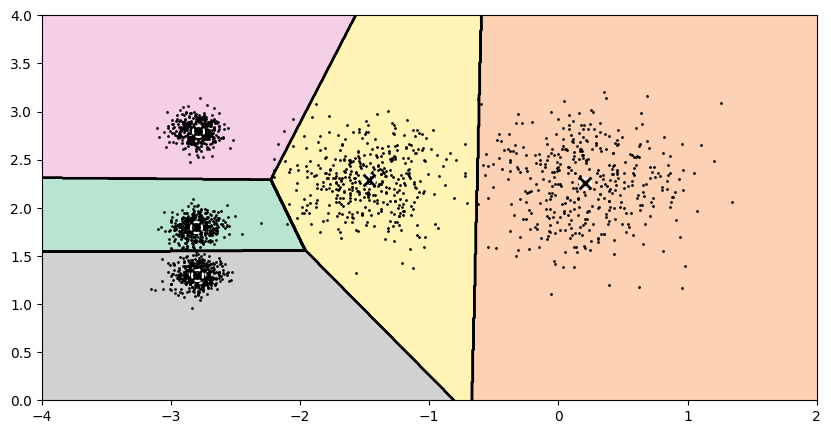

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
# plt.plot(X[:, 0], X[:, 1], 'ko', size=(1,1))

x1,x2 = np.meshgrid(np.linspace(-4, 2, 1000), np.linspace(0, 4, 1000))
xs_all = np.c_[x1.ravel(), x2.ravel()]
y_pred = kmeans.predict(xs_all).reshape(x1.shape)
plt.scatter(X[:,0], X[:, 1], s=1, c='k')
plt.contourf(x1, x2, y_pred, zorder=-2, alpha=0.9, cmap='Pastel2')
plt.contour(x1, x2, y_pred, zorder=-2, colors='k')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=2, marker='o',color='w', linewidths=8)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=2, marker='x',color='k', linewidths=12)

In [7]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)


def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                 cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)


### centroid initialization methods

In [8]:
# If you know a good approximation of centroids
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.59853725816836

In [9]:
kmeans.score(X)

-211.59853725816834

### K-mean ++

To avoid choosing bad starting centroids a new algorithm was proposed. It consists on giving a higher chance to choose points further away from the already selected centroids

### Accelerated k-mean and mini-batch k-means

In [10]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)
minibatch_kmeans.inertia_

c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


211.652398504332

c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it 

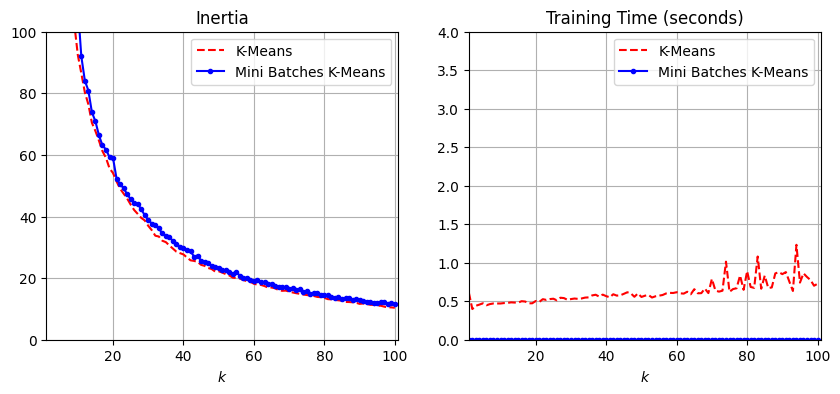

In [11]:
from timeit import timeit

max_k = 100
times = np.empty((max_k, 2))
inertias = np.empty((max_k, 2))

for k in range(1, max_k + 1):
    kmeans_time = KMeans(random_state=42, n_clusters=k, algorithm="full")
    minikmeans_time = MiniBatchKMeans(random_state=42, n_clusters=k)
    times[k-1,0] = timeit('kmeans_time.fit(X)', number=10, globals=globals())
    times[k-1,0] = timeit('minikmeans_time.fit(X)', number=10, globals=globals())
    inertias[k-1,0] = kmeans_time.inertia_
    inertias[k-1,1] = minikmeans_time.inertia_

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(range(1, max_k + 1), inertias[:,0], 'r--', label='K-Means')
plt.plot(range(1, max_k + 1), inertias[:,1], 'b.-', label='Mini Batches K-Means')
plt.xlabel(r"$k$")
plt.title("Inertia")
plt.legend()
plt.axis([1, max_k+1, 0, 100])
plt.grid()

plt.subplot(122)
plt.plot(range(1, max_k + 1), times[:,0], 'r--', label='K-Means')
plt.plot(range(1, max_k + 1), times[:,1], 'b.-', label='Mini Batches K-Means')
plt.xlabel(r"$k$")
plt.title("Training Time (seconds)")
plt.legend()
plt.axis([1, max_k+1, 0, 4])
plt.grid()


### Finding the optimal number of clusters

c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: Futur

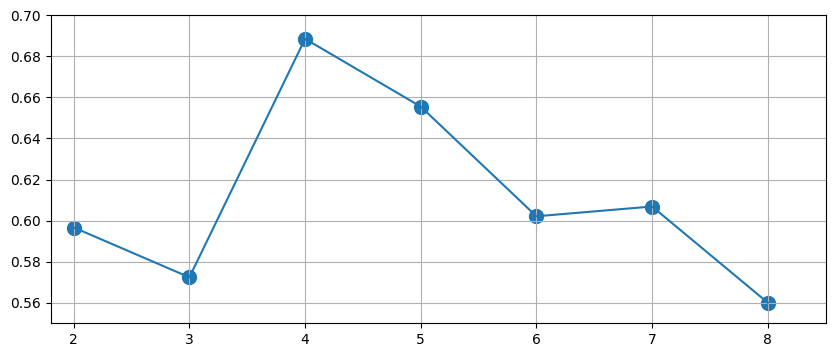

In [12]:
from sklearn.metrics import silhouette_score

k_max = 8
silhouette_scores = np.zeros(k_max-1).reshape(-1,1)
k_means_per_k = []
for i in range (2, k_max + 1):
    kmeans_test = KMeans(n_clusters=i, random_state=42)
    kmeans_test.fit(X)
    silhouette_scores[i-2, 0] = silhouette_score(X, kmeans_test.labels_)
    k_means_per_k.append(kmeans_test)

plt.figure(figsize=(10, 4))
plt.plot(range(2, k_max+1), silhouette_scores)
plt.scatter(range(2, k_max+1), silhouette_scores, s=100)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()

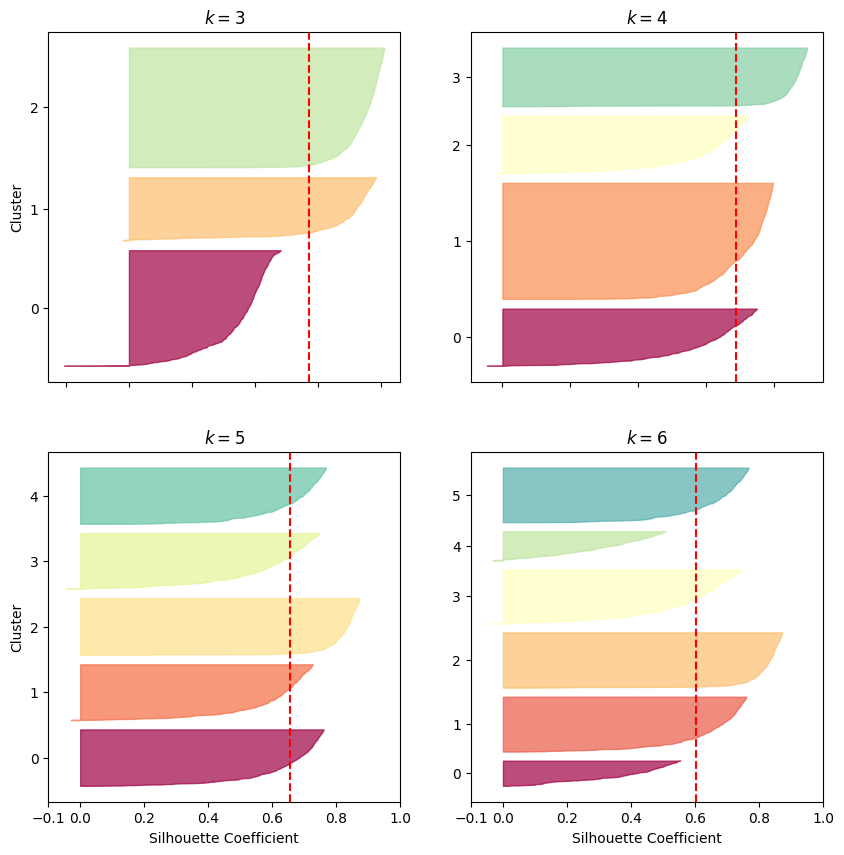

In [13]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(10,10))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    y_pred = k_means_per_k[k-2].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []

    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i/k)

        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs, facecolor = color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")


## Image Segmentation

In [14]:
import PIL
filepath = r"C:\Users\William Costa\Documents\repositories\hands_on_machine_learning\1_fundamentals_of_machine_learning\ladybug.png"

image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

In [15]:
X = image.reshape(-1, 3)
X.shape

(426400, 3)

In [16]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(image.shape)

c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: Futur

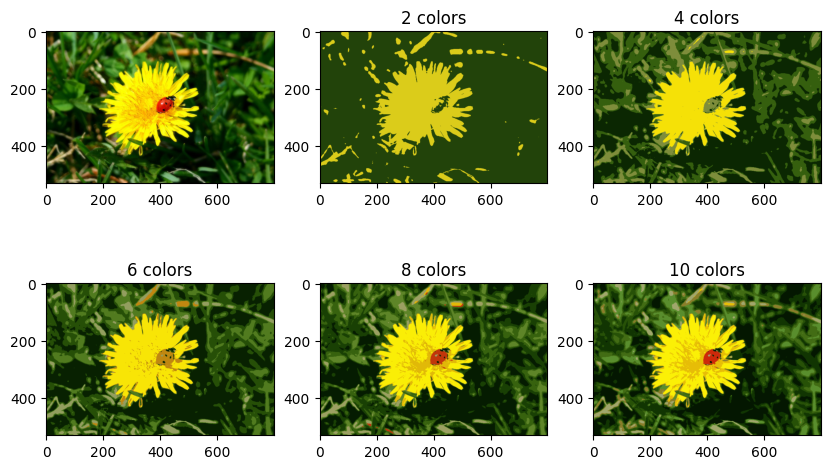

In [17]:
plt.figure(figsize=(10, 6))
plt.subplot(2,3,1)
plt.imshow(image / 255)

for k in reversed(range(2, 11, 2)):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    segmented_image = kmeans.cluster_centers_[kmeans.labels_]
    segmented_image = segmented_image.reshape(image.shape)

    plt.subplot(2, 3, k//2+1)
    plt.imshow(segmented_image / 255)
    plt.title(f"{k} colors")



In [18]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [19]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
logistic_reg = LogisticRegression(max_iter=10_000)
logistic_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [20]:
logistic_reg.score(X_test, y_test)

0.7481108312342569

In [21]:
# Find Images closer to cluster center (centroid)
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


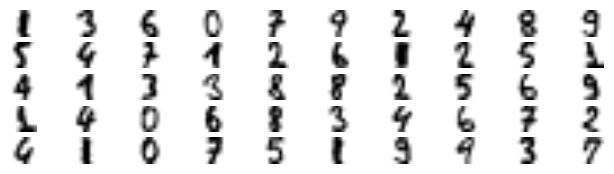

In [22]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

In [23]:
# Label centroids
y_representative_digits = np.array([
    1, 3, 6, 0, 7, 9, 2, 4, 8, 9,
    5, 4, 7, 1, 2, 6, 1, 2, 5, 1,
    4, 1, 3, 3, 8, 8, 2, 5, 6, 9,
    1, 4, 0, 6, 8, 3, 4, 6, 7, 2,
    4, 1, 0, 7, 5, 1, 9, 9, 3, 7
])

logistic_reg = LogisticRegression(max_iter=10_000)
logistic_reg.fit(X_representative_digits, y_representative_digits)
logistic_reg.score(X_test, y_test)

0.8488664987405542

In [24]:
# Label whole dataset
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [25]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train_propagated)
logistic_reg.score(X_test, y_test)

c:\Users\William Costa\Documents\repositories\hands_on_machine_learning\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8967254408060453

In [26]:
# Ignore Outliers

percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [27]:
logistic_reg = LogisticRegression(max_iter=10_000)
logistic_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
logistic_reg.score(X_test, y_test)

0.9093198992443325

In [28]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.9755555555555555

# DBSCAN

In [29]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [30]:
dbscan.labels_

array([ 0,  1,  2,  0,  2,  3,  4,  0,  4,  4,  1,  1,  2,  4,  1,  3,  5,
        1,  1,  2,  1,  0,  1,  2, -1,  4,  1,  5,  3,  5,  2,  2,  1,  2,
        1,  3,  6,  1,  1,  4,  2,  2,  1,  1,  2,  2,  2,  2,  1,  2,  0,
        2, -1,  4,  1,  7,  1,  0,  2,  1,  1,  3,  6,  2, -1,  4,  3,  2,
        1,  2,  7,  6,  4,  1,  1,  3,  1,  2,  1,  7,  4,  0,  7,  1,  1,
        1,  3,  0,  0,  2,  1,  2,  7,  2,  1,  2,  0,  2,  5,  2,  2,  6,
        4,  1,  4,  0,  1,  1,  3,  1,  2,  1,  1,  2,  2,  4,  2,  1,  1,
        1,  0,  2,  3,  4,  4,  4,  2,  2,  4,  1,  2,  1,  1,  4,  0,  7,
        3, -1,  3,  2,  4,  4,  4,  1,  4,  4,  4,  3,  4,  1,  2,  1,  4,
        2, -1,  4,  1,  2,  1,  2,  1,  3,  4,  4,  3,  1,  4,  2,  1,  0,
        2,  1,  5,  2,  2,  5,  0,  4,  1,  8,  6,  7,  2,  0,  0,  1,  2,
        7,  0,  4,  4,  2,  6,  3,  0,  4,  1,  3,  4, -1,  2,  1,  1,  1,
        6,  4,  1,  3,  2, -1,  6,  3,  4,  3,  5,  4, -1,  2,  1, -1,  4,
       -1,  2,  2,  0,  4

In [31]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  27,  28,  29,
        31,  32,  33,  34,  35,  37,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  53,  56,  58,  59,  60,  61,  62,  63,
        65,  66,  67,  69,  71,  72,  73,  74,  75,  76,  77,  78,  80,
        81,  82,  83,  85,  86,  87,  88,  89,  90,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110,
       111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 131, 132, 133, 134, 135, 136, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 197,
       198, 200, 201, 202, 203, 204, 205, 207, 208, 210, 211, 21

In [32]:
dbscan.components_

array([[-0.30761551,  0.91175536],
       [ 0.47745737,  0.88752795],
       [ 0.88871733, -0.52356646],
       ...,
       [ 0.95370108,  0.44737418],
       [ 0.9360871 ,  0.34068019],
       [ 0.50213784,  0.81892476]])

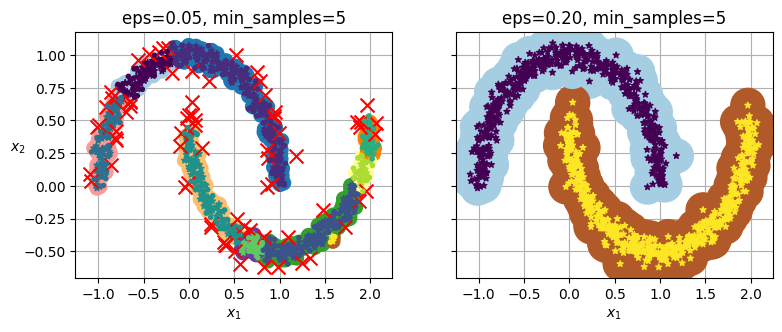

In [33]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))
plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)
    


In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [35]:
knn.predict([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

array([3, 4, 1, 5], dtype=int64)

# Gaussian Mixtures

In [54]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [55]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)
gm.weights_

array([0.40004337, 0.20954915, 0.39040749])

In [56]:
gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1], dtype=int64)

In [57]:
X_new, y_new = gm.sample(6)
X_new, y_new

(array([[-1.13703696,  1.77259815],
        [-0.65417865,  2.31131632],
        [-1.04667025,  1.75956739],
        [ 5.03936687, -0.31677997],
        [-1.03452413, -0.66532093],
        [ 0.93168723, -0.12949432]]),
 array([0, 0, 0, 1, 2, 2]))

In [75]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0,2,12))
    plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0,2,12), linewidth=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)
    
    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)


C:\Users\William Costa\AppData\Local\Temp\ipykernel_3400\2271265778.py:12: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0,2,12), linewidth=1, colors='k')


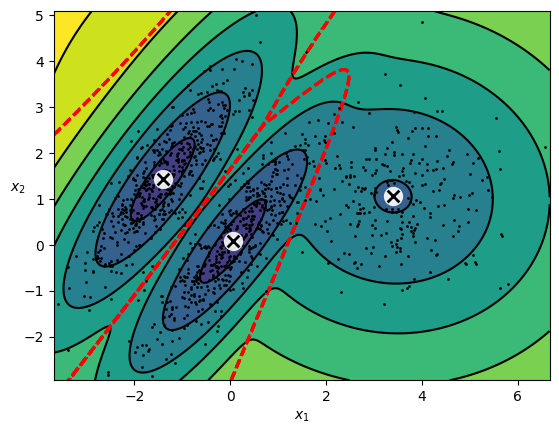

In [76]:
plot_gaussian_mixture(gm, X)

### Anomaly detection

In [78]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
anomalies = X[densities < density_threshold]

C:\Users\William Costa\AppData\Local\Temp\ipykernel_3400\2271265778.py:12: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0,2,12), linewidth=1, colors='k')


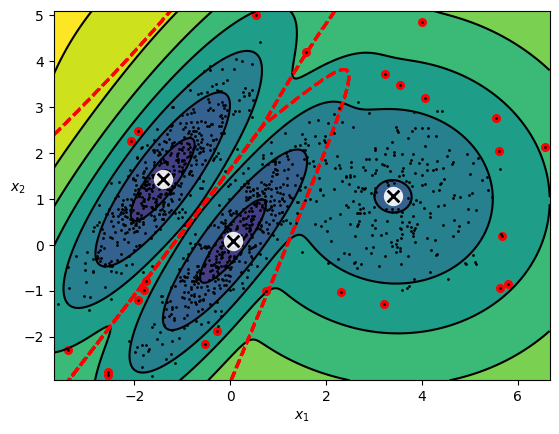

In [82]:
plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], marker='o', s=30, color='r')

# Bayesian Gaussian Mixture Models

In [83]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])